In [51]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [52]:
sys.path.append('/envs')
sys.path.append('/models')
import envs.viper as vpr
import models.models as models
import models.dqn as dqn

In [53]:
import importlib
importlib.reload(vpr); importlib.reload(models); importlib.reload(dqn)

<module 'models.dqn' from 'h:\\Coding Projects\\Python Projects\\Deep-XIV-Rotation\\models\\dqn.py'>

In [54]:
torch.cuda.empty_cache()

In [55]:
viper_env = vpr.Viper(_sks = 798)

b123


In [56]:
agent = dqn.DQN(viper_env, _max_history=8192)

Created model transnet_v1 with 15 features and 9 actions.
Model loaded onto cuda:0.
Layer (type:depth-idx)                        Output Shape              Param #
TransformerNetv1                              [196, 9]                  3,152,896
├─Sequential: 1-1                             [196, 7, 512]             --
│    └─Linear: 2-1                            [196, 7, 128]             2,048
│    └─ReLU: 2-2                              [196, 7, 128]             --
│    └─Linear: 2-3                            [196, 7, 256]             33,024
│    └─ReLU: 2-4                              [196, 7, 256]             --
│    └─Linear: 2-5                            [196, 7, 256]             65,792
│    └─ReLU: 2-6                              [196, 7, 256]             --
│    └─Linear: 2-7                            [196, 7, 256]             65,792
│    └─BatchNorm1d: 2-8                       [196, 7, 256]             14
│    └─ReLU: 2-9                              [196, 7, 256]     

In [57]:
action_sequence=[1, 3, 6, 8, 0, 2, 5, 0, 0]
agent.env.reset_env()
_sum = 0
for a in action_sequence:
    res = agent.env.step(a, True)
    _sum+=res[0]
    print(f'({res[0]:.2f}, {res[1]:.0f}, {res[2]:.2f})')
print(_sum)

Took action: 1-reaving_fangs @ 0.000
(0.43, 200, 203.94)
Took action: 3-swiftskins_sting @ 2.450
(0.61, 300, 313.32)
Took action: 6-hindsting_strike @ 4.900
(0.83, 400, 385.05)
Took action: 8-death_rattle @ 5.600
(0.61, 280, 272.98)
Took action: 0-steel_fangs @ 6.980
(0.64, 300, 287.31)
Took action: 2-hunters_sting @ 9.060
(0.62, 300, 293.26)
Took action: 5-flanksbane_fang @ 11.140
(1.18, 550, 551.55)
Took action: 0-steel_fangs @ 13.220
(0.44, 220, 221.40)
Took action: 0-steel_fangs @ 13.920
(-0.23, 0, 0.00)
5.126222222222222


In [58]:
agent.reset_environment()

In [59]:
agent.train(gamma=0.80, num_epochs=110, session_limit=100)

Epoch 0 Loss: 4.37e-04 E_0: 0.25 E_1: 0.10 G: 0.80 Rewards: 2.4 Eval Rewards: -10.01, LR: 1.3e-05 SKS: 528
Epoch 1 Loss: 1.66e-04 E_0: 0.25 E_1: 0.10 G: 0.80 Rewards: 0.5 Eval Rewards: -7.41, LR: 1.3e-05 SKS: 420
Epoch 2 Loss: 1.22e-04 E_0: 0.25 E_1: 0.10 G: 0.80 Rewards: -3.4 Eval Rewards: -7.41, LR: 1.4e-05 SKS: 582
Epoch 3 Loss: 1.17e-04 E_0: 0.25 E_1: 0.10 G: 0.80 Rewards: -1.5 Eval Rewards: -7.41, LR: 1.4e-05 SKS: 768
Epoch 4 Loss: 1.12e-04 E_0: 0.25 E_1: 0.09 G: 0.80 Rewards: 0.0 Eval Rewards: -7.41, LR: 1.5e-05 SKS: 822
Epoch 5 Loss: 1.16e-04 E_0: 0.25 E_1: 0.09 G: 0.80 Rewards: 2.1 Eval Rewards: -7.41, LR: 1.5e-05 SKS: 420
Epoch 6 Loss: 1.23e-04 E_0: 0.25 E_1: 0.09 G: 0.80 Rewards: 7.4 Eval Rewards: -3.06, LR: 1.6e-05 SKS: 822
Epoch 7 Loss: 1.17e-04 E_0: 0.25 E_1: 0.09 G: 0.80 Rewards: -5.8 Eval Rewards: -7.41, LR: 1.6e-05 SKS: 768
Epoch 8 Loss: 1.18e-04 E_0: 0.25 E_1: 0.09 G: 0.80 Rewards: 8.0 Eval Rewards: -7.41, LR: 1.7e-05 SKS: 768
Epoch 9 Loss: 1.20e-04 E_0: 0.25 E_1: 0.08

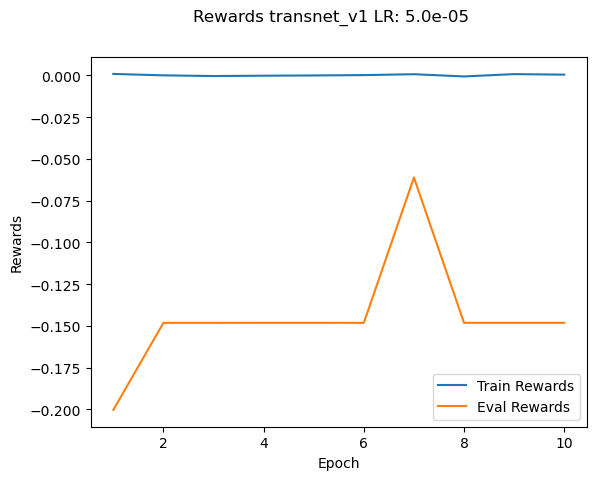

In [60]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle(f'Rewards {agent.model_name} LR: {agent.lr:.1e}')
ax.plot(history_x, history_y)
ax.legend(['Train Rewards', 'Eval Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph.png', bbox_inches='tight')
plt.show()

In [61]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_best.pth')

h:\Coding Projects\Python Projects\Deep-XIV-Rotation\models\dqn.py:345: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(checkpoint['model'])


In [13]:
viper_env.compute_gcd(2.5, 798, 15)

2.08

In [62]:
# 2.12, 2.11, 2.10, 2.09, 2.08
#[420, 528, 582, 768, 822]
agent.test(num_steps=5, _sks=822)

tensor([ 2.4500, 10.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000])
Took action: 0-steel_fangs @ 0.000
(0.43, 200, 190.97)
Took action: 0-steel_fangs @ 0.700
(-0.23, 0, 0.00)
Took action: 0-steel_fangs @ 1.100
(-0.23, 0, 0.00)
Took action: 0-steel_fangs @ 1.500
(-0.23, 0, 0.00)
Took action: 0-steel_fangs @ 1.900
(-0.23, 0, 0.00)


-0.49555555555555564

In [15]:
pred = agent.predict(agent.env.state())
pred

tensor([[-0.0209,  0.0600, -0.0077,  0.0606,  0.0515,  0.0271,  0.0353,  0.0782,
         -0.0006]], device='cuda:0')

In [16]:
agent.env.reset_env()
pred = agent.predict(agent.env.state())
pred

tensor([[ 0.1179,  0.1261,  0.0107,  0.0510, -0.0158, -0.0016, -0.0866,  0.0297,
         -0.0682]], device='cuda:0')

In [17]:
agent.env.state()

tensor([ 2.5000, 10.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000])

terraform aws
kubernites
helm?
look into

In [1]:
from collections import deque
import itertools

In [28]:
test_q = deque([], maxlen=3)
test_q.appendleft([1, 2])
test_q.appendleft([1, 3])
test_q.appendleft([2, 4])
test_q.appendleft([3, 1])
test_q_out = []
for i in range(test_q.maxlen):
    test_q_out.append(torch.tensor(test_q[i], dtype=torch.float32))
torch.stack(test_q_out, dim=0)

tensor([[3., 1.],
        [2., 4.],
        [1., 3.]])

In [31]:
test_q.clear()
test_q

deque([], maxlen=3)

In [48]:
temppp = torch.rand((7,3))
temppp2 = torch.rand(3)
print(temppp, temppp2)

tensor([[0.8276, 0.2808, 0.9009],
        [0.0067, 0.8993, 0.5847],
        [0.5907, 0.1831, 0.9466],
        [0.0575, 0.8323, 0.6673],
        [0.5993, 0.2255, 0.9230],
        [0.4593, 0.8210, 0.6263],
        [0.2399, 0.5762, 0.1010],
        [0.3110, 0.0190, 0.6009]]) tensor([0.5336, 0.9040, 0.8243])


In [50]:
torch.vstack((temppp2, temppp))[:-1]

tensor([[0.5336, 0.9040, 0.8243],
        [0.8276, 0.2808, 0.9009],
        [0.0067, 0.8993, 0.5847],
        [0.5907, 0.1831, 0.9466],
        [0.0575, 0.8323, 0.6673],
        [0.5993, 0.2255, 0.9230],
        [0.4593, 0.8210, 0.6263],
        [0.2399, 0.5762, 0.1010]])